In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Q_matrix = np.array([[50142.56239554, 50478.20531291],
       [50224.41728942, 50469.54698253],
       [51979.4484728 , 52185.60337894],
       [54380.91595989, 54597.62247261],
       [55988.71238238, 55851.73566667]])

In [3]:
L = 50
L_half = L/2
a = 1.66

In [4]:
A = (50**2 - (np.pi*(1.66**2)))
D0 = 1
tau = 1.10688**2/(3*D0)
dt = 0.01
T = 100
steps = int(T/dt)
tot_states = 5
tot_actions = 2

In [5]:
bin_size = L/(2*tot_states)
bin_ranges = np.linspace(0, L/2, tot_states+1)

In [6]:
def dist_to_state(r):
    return np.minimum((r//bin_size).astype(int), tot_states-1)

In [7]:
rho_arr = np.array([0.2,0.4])
v_arr = np.linspace(0,20,45)
J_hist = np.zeros(len(v_arr))

In [8]:
dict_ = {'0.2' : [] , '0.4' : []}

In [9]:
for rho in rho_arr:
    '''
    Now we have to plot J vs V at two global densities
    
    dict_ = {rho : [J_values]}
    
    len_of_J_values = len(v_list)
    
    for rho in rho_list:
    
        for v in v_list
            
            initialize J = 0
            initialize_positions
            
            
            for step in range(int(T/dt)):
                
                update position as before
                
                if some 'num' values of particles go within absorbing radius
                then add them to J
                plot
                then modify using boundary condn and randomize the particle 
                that enters absorbing region
                
            J/=T
            
            append_to_rho_values in dict_
            
            
            
    
    '''
    N_new = int(rho*(A))

    for v0 in v_arr:
        J_ = 0
            
        pos = (np.random.rand(N_new,2) - 0.5)*L
        phi = np.random.rand(N_new) * 2*np.pi
    
        for step in range(steps):
            
            r = np.linalg.norm(pos,axis = 1)
            s = dist_to_state(r)

            best = np.argmax(Q_matrix[s] , axis = 1)
            phi += np.sqrt(2*dt/tau)*np.random.randn(N_new)
            
            direction_vectors = np.vstack((np.cos(phi) , np.sin(phi))).T
            v = direction_vectors * best[:,None] * v0
            
            pos += v*dt + np.sqrt(2*D0*dt)*np.random.randn(N_new,2)
            pos = ((pos + L/2) % L) - L/2
        
            r = np.linalg.norm(pos, axis=1)
            close_indices = np.where(r < a)[0]

            n_reset = len(close_indices)
            
            J_+=n_reset
        
            while n_reset > 0:
            
                new_pos = (np.random.rand(n_reset, 2) - 0.5) * L
                new_phi = np.random.rand(n_reset) * 2 * np.pi

                pos[close_indices] = new_pos
                phi[close_indices] = new_phi
            
                r = np.linalg.norm(pos, axis=1)
            
                close_indices = np.where(r < a)[0]

                n_reset = len(close_indices)
            
        J_/=T
        dict_[str(rho)].append(J_/rho)
        

In [10]:
print(dict_['0.2'])
print(dict_['0.4'])

[3.85, 4.0, 4.0, 4.699999999999999, 4.65, 6.1, 5.3, 5.3, 5.749999999999999, 6.3999999999999995, 7.85, 8.799999999999999, 8.299999999999999, 10.149999999999999, 9.15, 10.45, 10.5, 11.45, 11.25, 10.349999999999998, 11.499999999999998, 11.499999999999998, 11.299999999999999, 11.95, 12.9, 12.6, 13.3, 13.35, 11.7, 12.849999999999998, 12.399999999999999, 13.85, 12.399999999999999, 13.1, 12.649999999999999, 13.75, 12.5, 13.45, 13.649999999999999, 12.95, 13.3, 14.15, 13.85, 14.950000000000001, 14.049999999999999]
[3.55, 3.75, 4.1, 4.5249999999999995, 5.124999999999999, 4.749999999999999, 5.625, 6.8500000000000005, 7.125, 7.925, 8.924999999999999, 7.925, 9.174999999999999, 9.549999999999999, 9.899999999999999, 10.375, 10.674999999999999, 10.325, 10.424999999999999, 10.5, 11.174999999999999, 12.325, 11.674999999999999, 12.024999999999999, 12.075, 12.35, 12.475, 11.999999999999998, 12.475, 13.0, 12.875, 14.25, 13.5, 12.95, 13.799999999999999, 13.35, 12.95, 13.85, 14.125, 13.575, 12.375, 13.649999

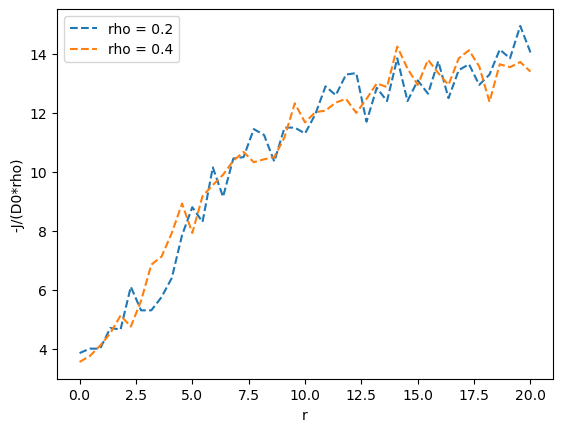

In [14]:
plt.plot(v_arr , dict_['0.2'],label = 'rho = 0.2' , linestyle = '--')
plt.plot(v_arr , dict_['0.4'],label = 'rho = 0.4' , linestyle = '--')
plt.xlabel('r')
plt.ylabel('-J/(D0*rho)')
plt.legend()

In [15]:
min(dict_['0.2'])

3.85

In [16]:
min(dict_['0.4'])

3.55